In [1]:
# The term you are looking for to find the best choice of parameters when you have data values:
# supervised dimensionality reduction

#shift-tab on a function gets its docstring

%pylab inline
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.optimize as optimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
matplotlib.__version__

'2.0.0rc1'

In [23]:
sys.path.insert(0, '../src')

import waveform as wave
import waveformset as ws
import trainingset as train
import taylorf2
import gaussianprocessregression as gpr
import designofexperiment as doe
#import pycbcwaveform as pycbcwave
import lalwaveform
import plotparams
import greedy
import empiricalinterpolation as eim
import surrogate
import diagnostics
import window

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(train)
imp.reload(taylorf2)
imp.reload(gpr)
imp.reload(doe)
#imp.reload(pycbcwave)
imp.reload(lalwaveform)
imp.reload(greedy)
imp.reload(eim)
imp.reload(surrogate)
imp.reload(diagnostics)
imp.reload(window)

import constants
imp.reload(constants)
from constants import *

In [13]:
from lalwaveform import dimensionless_td_waveform, dimensionless_fd_waveform
import pycbc.waveform

In [14]:
from scipy import stats

# Make training set and save it to a file

In [15]:
def uniform_grid(n, limits):
    """This is really stupid.
    """
    points = []
    for i in range(n):
        xmin, xmax = limits[0, 0], limits[0, 1]
        x0 = np.linspace(xmin, xmax, n)
        for j in range(n):
            xmin, xmax = limits[1, 0], limits[1, 1]
            x1 = np.linspace(xmin, xmax, n)
            for k in range(n):
                xmin, xmax = limits[2, 0], limits[2, 1]
                x2 = np.linspace(xmin, xmax, n)
                for l in range(n):
                    xmin, xmax = limits[3, 0], limits[3, 1]
                    x3 = np.linspace(xmin, xmax, n)
                    for m in range(n):
                        xmin, xmax = limits[4, 0], limits[4, 1]
                        x4 = np.linspace(xmin, xmax, n)
                        
                        point = [x0[i], x1[j], x2[k], x3[l], x4[m]]
                        #print point
                        points.append(point)
    #print points
    return np.array(points)

In [17]:
# Parameters for the training set

limits = np.array([[1.0/3.0, 1.0], [-0.7, 0.7], [-0.7, 0.7], [0, 10000], [0, 10000]])
corners = uniform_grid(2, limits)

#Ndata = 512
Ndata = 32
lhd = doe.latin_hypercube(Ndata, limits)
params = np.concatenate((corners, lhd))

params.shape

(64, 5)

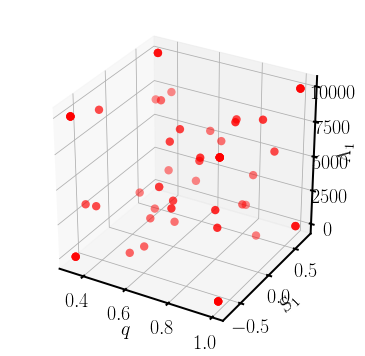

In [18]:
fig = plt.figure(figsize=(6, 6))
axes = fig.add_subplot(111, projection='3d')
x, y, z = params[:, 0], params[:, 1], params[:, 3]
axes.scatter(x, y, z, c='r', edgecolor='none', marker='o', s=70)
axes.set_xlabel('$q$')
axes.set_ylabel('$S_1$')
axes.set_zlabel('$\Lambda_1$')

In [19]:
print [np.min(params[:, j]) for j in range(5)]
print [np.max(params[:, j]) for j in range(5)]

[0.33333333333333331, -0.69999999999999996, -0.69999999999999996, 0.0, 0.0]
[1.0, 0.69999999999999996, 0.69999999999999996, 10000.0, 10000.0]


In [20]:
########################################################
#     The parameters to be used for all waveforms      #
########################################################

f_min = 0.0004
delta_t = 10.0
approximant = 'SpinTaylorT4'
amp_ord = 0

min_total_time = 4.0*train.zero_pn_coalescence_time(f_min, 1.0)
n_ext = train.next_pow_2(min_total_time, delta_t)
print min_total_time, n_ext

winon_i = f_min
winon_f = 0.0005
winoff_i = 0.008
winoff_f = 0.009
trunc_i = winon_f
trunc_f = 0.010
#trunc_f = MF_ISCO
npoints = 10000
win = 'planck'
f_coalescence = winoff_f

ref_delta_f = 1.0e-8

16993795.3652 2097152


In [24]:
h_filename = '../data/h_training_set.hdf5'
dh_filename = '../data/dh_training_set.hdf5'

train.make_training_set(
    h_filename, dh_filename, params,
    f_min, delta_t, 
    winon_i, winon_f, winoff_i, winoff_f, 
    n_ext,
    trunc_i, trunc_f, ref_delta_f, npoints=npoints, 
    win=win, f_coalescence=f_coalescence, remove_start_phase=True, 
    approximant=approximant, amplitude_order=amp_ord)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63


In [27]:
# Generate the randomly sampled set
Ndata = 100
limits = np.array([[1.0/3.0, 1.0], [-0.7, 0.7], [-0.7, 0.7], [0, 10000], [0, 10000]])
params = doe.uniform_random_samples(Ndata, limits)

h_filename = '../data/h_test_set_rand.hdf5'
dh_filename = '../data/dh_test_set_rand.hdf5'

train.make_training_set(
    h_filename, dh_filename, params,
    f_min, delta_t, 
    winon_i, winon_f, winoff_i, winoff_f, 
    n_ext,
    trunc_i, trunc_f, ref_delta_f, npoints=npoints, 
    win=win, f_coalescence=f_coalescence, remove_start_phase=True, 
    approximant=approximant, amplitude_order=amp_ord)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99


In [28]:
q = 0.6
spin1z_arr = np.linspace(-0.7, 0.7, 51)
spin2z = 0.2
lambda1 = 2000.0
lambda2 = 1000.0
params = np.array([[q, spin1z, spin2z, lambda1, lambda2] for spin1z in spin1z_arr])

h_filename = '../data/h_test_set_uniform.hdf5'
dh_filename = '../data/dh_test_set_uniform.hdf5'

train.make_training_set(
    h_filename, dh_filename, params,
    f_min, delta_t, 
    winon_i, winon_f, winoff_i, winoff_f, 
    n_ext,
    trunc_i, trunc_f, ref_delta_f, npoints=npoints, 
    win=win, f_coalescence=f_coalescence, remove_start_phase=True, 
    approximant=approximant, amplitude_order=amp_ord)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50


# Plots of training set

In [29]:
h_trainset = ws.HDF5WaveformSet('../data/h_training_set.hdf5')
dh_trainset = ws.HDF5WaveformSet('../data/dh_training_set.hdf5')

In [30]:
h_testset_rand = ws.HDF5WaveformSet('../data/h_test_set_rand.hdf5')
dh_testset_rand = ws.HDF5WaveformSet('../data/dh_test_set_rand.hdf5')

In [31]:
h_testset_uni = ws.HDF5WaveformSet('../data/h_test_set_uniform.hdf5')
dh_testset_uni = ws.HDF5WaveformSet('../data/dh_test_set_uniform.hdf5')

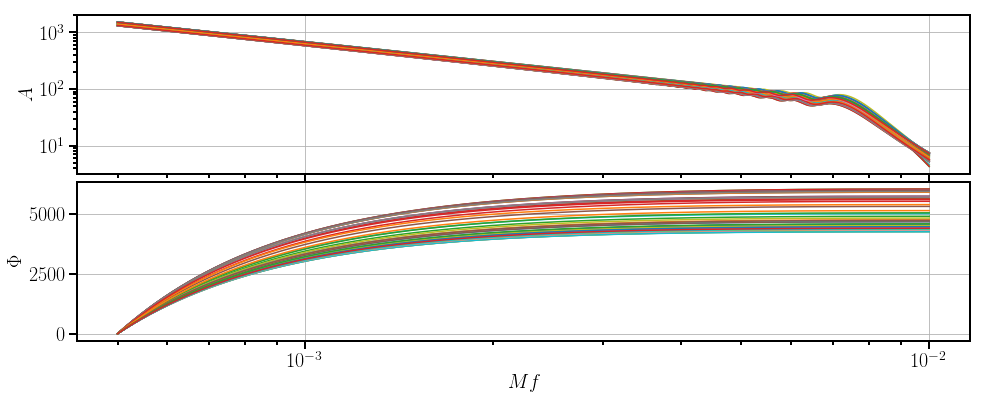

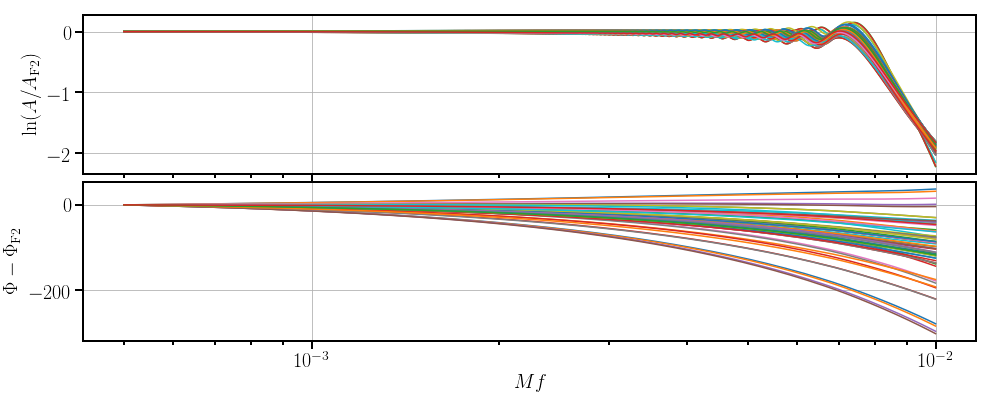

In [32]:
fig, (ax1, ax2) = wave.plot_waveforms_fd([h_trainset[i] for i in range(len(h_trainset))])
ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax2.set_ylabel(r'$\Phi$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

fig, (ax1, ax2) = wave.plot_waveforms_fd([dh_trainset[i] for i in range(len(dh_trainset))])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

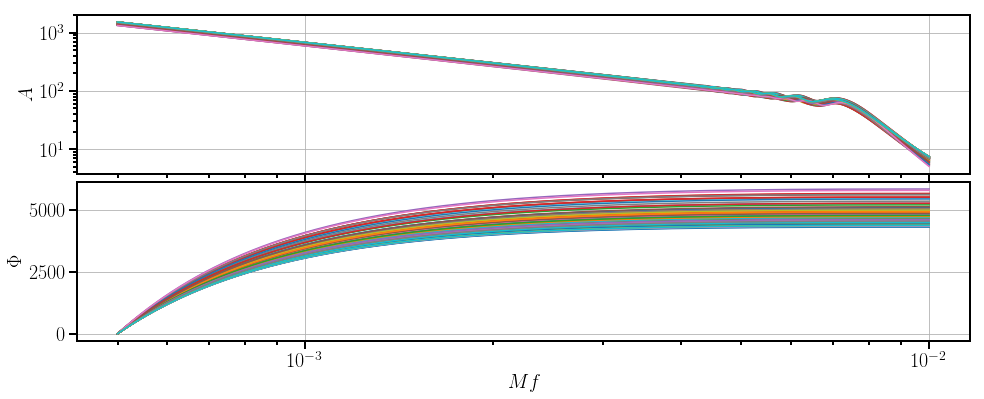

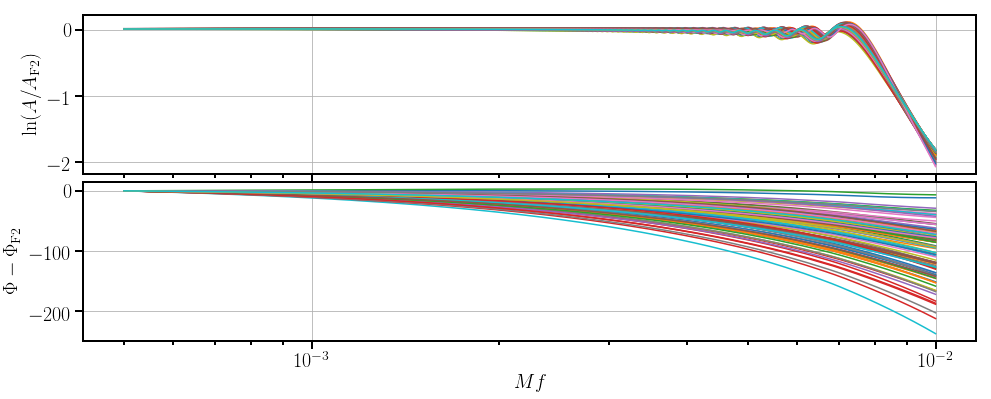

In [33]:
fig, (ax1, ax2) = wave.plot_waveforms_fd([h_testset_rand[i] for i in range(len(h_testset_rand))])
ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax2.set_ylabel(r'$\Phi$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

fig, (ax1, ax2) = wave.plot_waveforms_fd([dh_testset_rand[i] for i in range(len(dh_testset_rand))])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

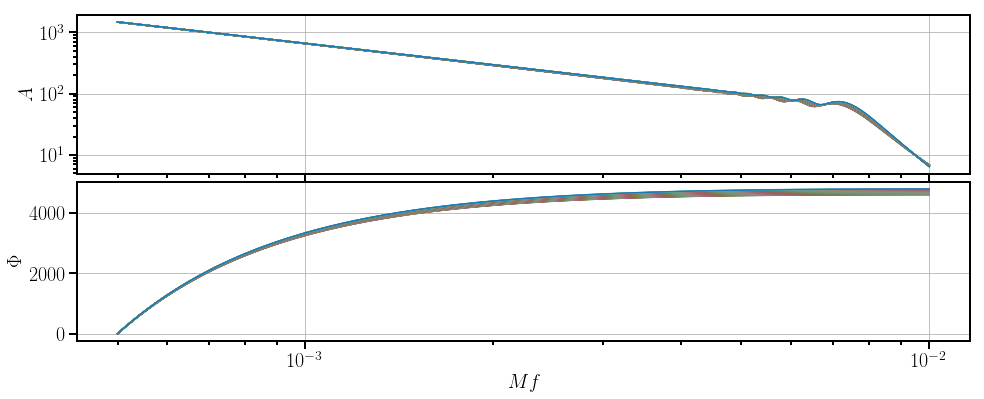

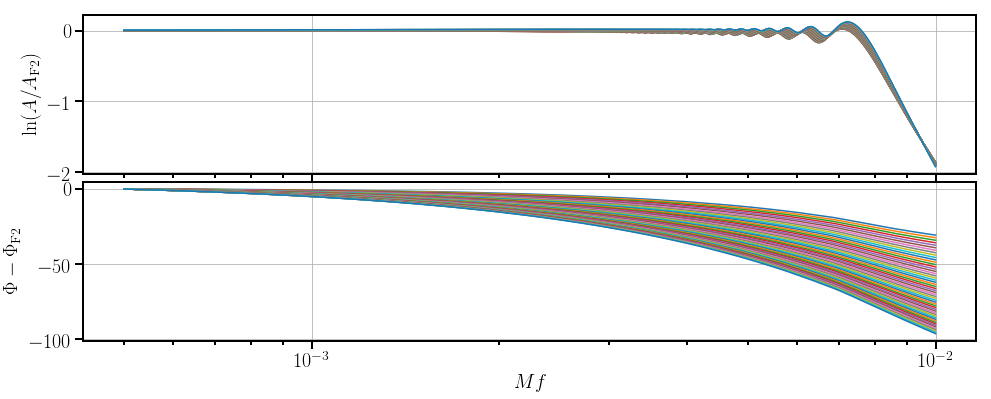

In [34]:
fig, (ax1, ax2) = wave.plot_waveforms_fd([h_testset_uni[i] for i in range(len(h_testset_uni))])
ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax2.set_ylabel(r'$\Phi$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

fig, (ax1, ax2) = wave.plot_waveforms_fd([dh_testset_uni[i] for i in range(len(dh_testset_uni))])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Analyze variation with respect to waveform parameters
1. Check that dh variation is much smaller than h variation.
2. Check that amp/phase vary smoothly as a function of waveform parameters.

In [35]:
def range_of_freq(h_list):
    """Calculate the max and min values of the amplitude and range
    as a function of frequency.
    """
    freq = h_list[0].x
    nwave = len(h_list)
    nfreq = len(freq)
    
    amps = np.array([h_list[i].amp for i in range(nwave)])
    amp_min = np.array([np.min(amps[:, j]) for j in range(nfreq)])
    amp_max = np.array([np.max(amps[:, j]) for j in range(nfreq)])
    
    phases = np.array([h_list[i].phase for i in range(nwave)])
    phase_min = np.array([np.min(phases[:, j]) for j in range(nfreq)])
    phase_max = np.array([np.max(phases[:, j]) for j in range(nfreq)])
    
    return freq, amp_min, amp_max, phase_min, phase_max

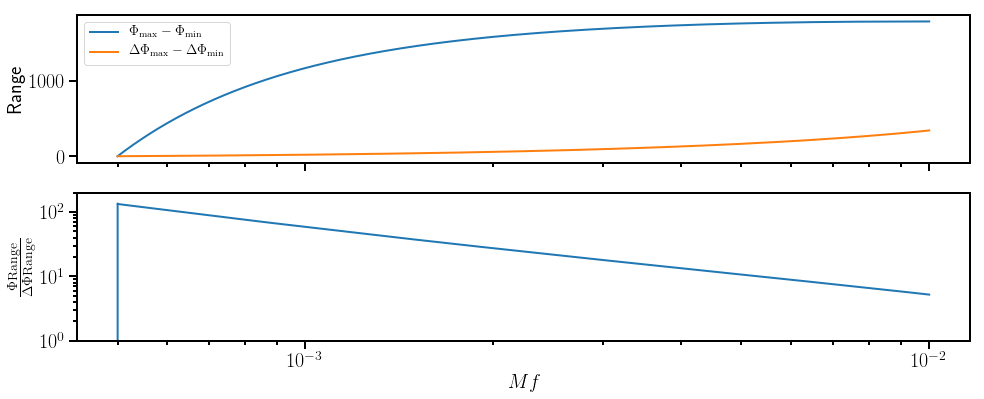

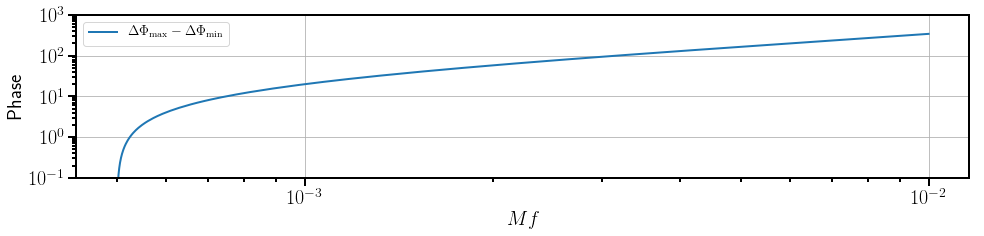

In [36]:
freq1, amp_min1, amp_max1, phase_min1, phase_max1 = range_of_freq(h_trainset)
freq2, amp_min2, amp_max2, phase_min2, phase_max2 = range_of_freq(dh_trainset)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(16, 6))

ax1.plot(freq1, phase_max1-phase_min1, ls='-', lw=2, label=r'$\Phi_{\rm max}-\Phi_{\rm min}$')
ax1.plot(freq2, phase_max2-phase_min2, ls='-', lw=2, label=r'$\Delta\Phi_{\rm max}-\Delta\Phi_{\rm min}$')
ax1.set_xscale('log')
# ax1.set_yscale('log')
# ax1.set_ylim(0.1, 1.0e4)
ax1.set_ylabel('Range')
ax1.legend()

ax2.plot(freq1, (phase_max1-phase_min1)/(phase_max2-phase_min2), ls='-', lw=2)
#ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(1.0, 200.)
ax2.set_xlabel('$Mf$')
ax2.set_ylabel(r'$\frac{\Phi{\rm Range}}{\Delta\Phi {\rm Range}}$')



fig, ax1 = plt.subplots(1, figsize=(16, 3))
ax1.plot(freq2, phase_max2-phase_min2, ls='-', lw=2, label=r'$\Delta\Phi_{\rm max}-\Delta\Phi_{\rm min}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1.0e-1, 1.0e3)
ax1.set_ylabel('Phase')
ax1.set_xlabel('$Mf$')
ax1.legend()
ax1.grid()

0.01 725.090869704


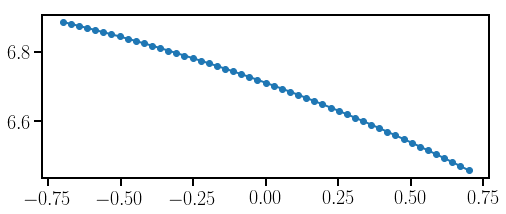

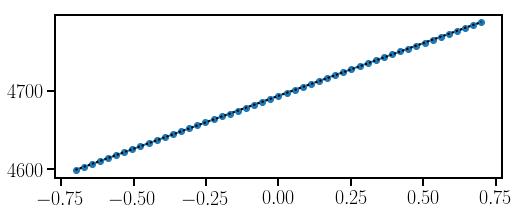

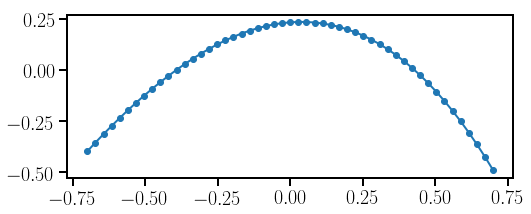

In [37]:
mf = 0.01
print mf, mf_to_f(mf, 2.8)

ps = []
amps = []
for i in range(len(h_testset_uni)):
    p = h_testset_uni.get_waveform(i, data='parameters')[1]
    h = h_testset_uni[i]
    amp = h.interpolate('amp')(mf)
    ps.append(p)
    amps.append(amp)
    
fig, axes = plt.subplots(1, figsize=(8, 3))
axes.plot(ps, amps, 'o', ls='-', lw=2)

ps = []
phases = []
for i in range(len(h_testset_uni)):
    p = h_testset_uni.get_waveform(i, data='parameters')[1]
    h = h_testset_uni[i]
    phase = h.interpolate('phase')(mf)
    ps.append(p)
    phases.append(phase)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(ps, phases)
x_fit = spin1z_arr
y_fit = intercept + slope*x_fit

fig, axes = plt.subplots(1, figsize=(8, 3))
axes.plot(ps, phases, 'o', ls='-', lw=2)
axes.plot(x_fit, y_fit, ls=':', lw=2, c='k')

fig, axes = plt.subplots(1, figsize=(8, 3))
axes.plot(ps, phases-y_fit, 'o', ls='-', lw=2)

0.01 725.090869704


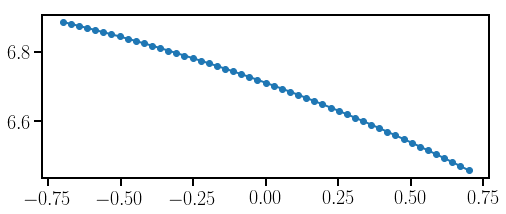

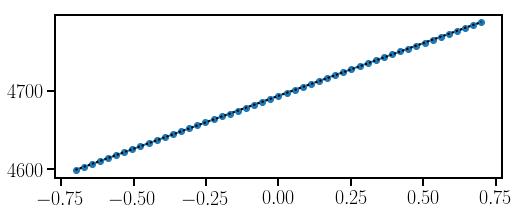

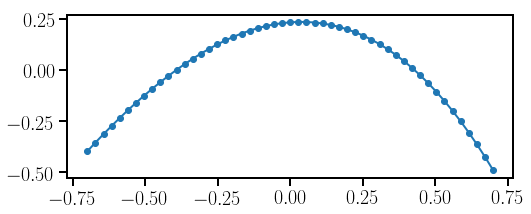

In [38]:
mf = 0.01
print mf, mf_to_f(mf, 2.8)

ps = []
amps = []
for i in range(len(h_testset_uni)):
    p = h_testset_uni.get_waveform(i, data='parameters')[1]
    h = h_testset_uni[i]
    amp = h.interpolate('amp')(mf)
    ps.append(p)
    amps.append(amp)
amps = np.array(amps)
    
fig, axes = plt.subplots(1, figsize=(8, 3))
axes.plot(ps, amps, 'o', ls='-', lw=2)

ps = []
phases = []
for i in range(len(h_testset_uni)):
    p = h_testset_uni.get_waveform(i, data='parameters')[1]
    h = h_testset_uni[i]
    phase = h.interpolate('phase')(mf)
    ps.append(p)
    phases.append(phase)
phases=np.array(phases)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(ps, phases)
x_fit = spin1z_arr
y_fit = intercept + slope*x_fit

fig, axes = plt.subplots(1, figsize=(8, 3))
axes.plot(ps, phases, 'o', ls='-', lw=2)
axes.plot(x_fit, y_fit, ls=':', lw=2, c='k')

fig, axes = plt.subplots(1, figsize=(8, 3))
axes.plot(ps, phases-y_fit, 'o', ls='-', lw=2)